**#NTSB Aviation Data Analysis**

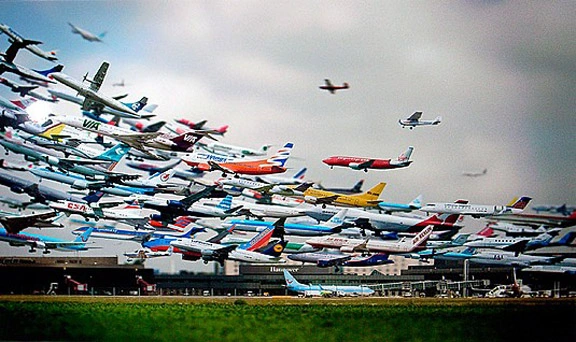

**Overview**

This project analyzes the NTSB aviation accident data from 1962-2023 about civil aviation accidents and selected inncidnets in the United States and international waters. Descriptive analysis of the accident data show that**....**
-**findings**
-**findings**
-**findings**

**### Do we say here that we are only looking at data from post 9/11 which ranges from 2001 - 2022/29/12###**

We can use this analysis to make the best decision in aircraft make/model, engine type, and region of operations.

**Business Problem**

<Company Name> is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commerical and private enterprises, but do not know anything about the potential risks of aircraft. We will be analyzing the NTSB Aviation Accident data to determine which aircraft and operation location are the lowest risk for <company name> to start this new business endeavor in the United States

**Data Understanding**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
aviation_df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

In [39]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [40]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [41]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

**<_Data Preparation_>**

**1.) Data Cleaning**

We make the column easier to work with by normalizing names. We will be creating a new dataframe with data from just the United States, and looking at accident data from November 19th 2001, when the air was clear for flight post 9/11

In [42]:
# Clean column names, replacing . to _ and making them lowercase
aviation_df = aviation_df.rename(columns={c: c.lower().replace('.', '_') for c in aviation_df.columns})

In [43]:
# Convert event_date column to datetime format
aviation_df.loc[:,'event_date'] = pd.to_datetime(aviation_df['event_date'])

# We will be looking at data from 2001 to 2022
df = aviation_df[aviation_df['event_date'] > '2001-11-19']

In [44]:
#Creating a new dataframe with data from the US
usa_df = df[df['country'] == 'United States']

In [45]:
# Split location column into city and state columns
usa_df[['city', 'state']] = usa_df['location'].str.split(', ', n=1, expand=True)

C:\Users\18324\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
#We are only interested in airplanes in aircraft category
usa_df = usa_df[usa_df['aircraft_category'] == 'Airplane']

**2.) Missing Values**

We will clean up the missing values in columns containing data on injuries and fatalities. From examining the "Injury Severity" column we can see that all the missing values in the "Total_Fatal_Injuries" column correspond to a value of "Non-Fatal" in "Injury_Severity". Therefore we will see these missing values equal to zero in the "Total_Fatal_Injuries" column.

In [47]:
#Cleaning the injury severity column
usa_df['injury_severity'] = usa_df['injury_severity'].replace(regex=r'Fatal\(\d+\)', value='Fatal')

**Private Plane Risk Assessment**

The first portion of the analysis will focus on private planes. We define a private plane as one which carries less than 20 passengers total. Private planes generally have either 1 or 2 engines. Our goal will be to determine the safest make and model of private planes, as well as whether it is safer to have 1 or 2 engines.

We also removed several columns which were not necessary to our analysis.

We will add the sum of all total injury columns and uninjured columns to calculate total number of passangers per plane. this will allow us to distingush between private and commerical

In [52]:
usa_df['passengers'] = usa_df['total_uninjured']+usa_df['total_minor_injuries']+usa_df['total_serious_injuries']+usa_df['total_fatal_injuries']

In [53]:
private_planes = usa_df.loc[usa_df['passengers'] <20]

We now have a subset of the data that focuses on planes estimated to be carrying less than 20 passengers. We will examine the distributions of make and model to determine what recommendations should be made. First, we will clean up these columns by removing rows with null values (there are very few).

In [54]:
private_planes=private_planes.dropna(subset=['make', 'model'])

#cleaning up some duplicate names in the 'make' column.
private_planes['make']=private_planes['make'].str.title()

**Visualization**

Next we will create visualizations to see which makes and models are most commonly involved in crashes, as well as which ones have the highest number of fatalities. We will examine the 20 most common of each.

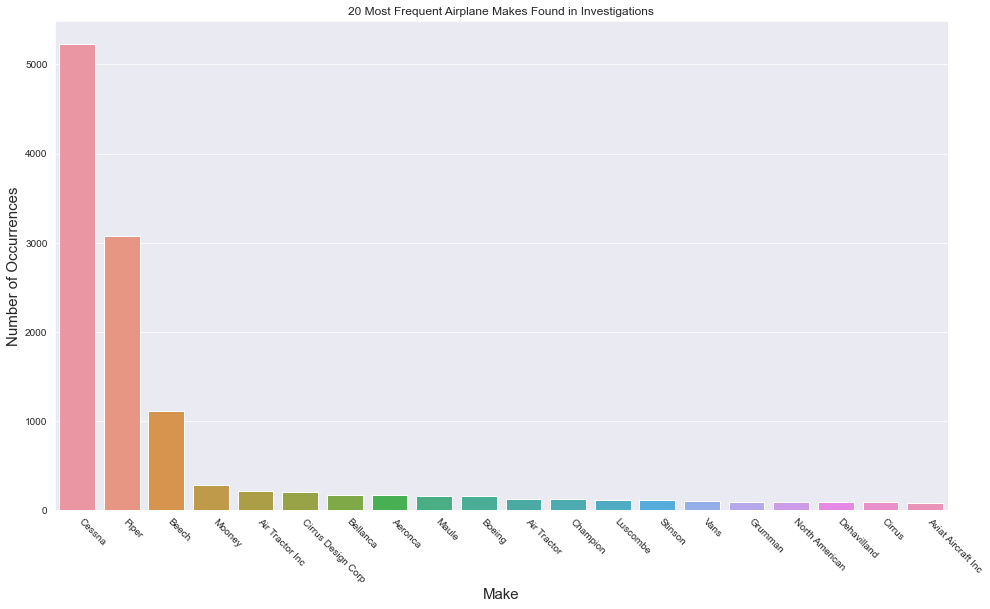

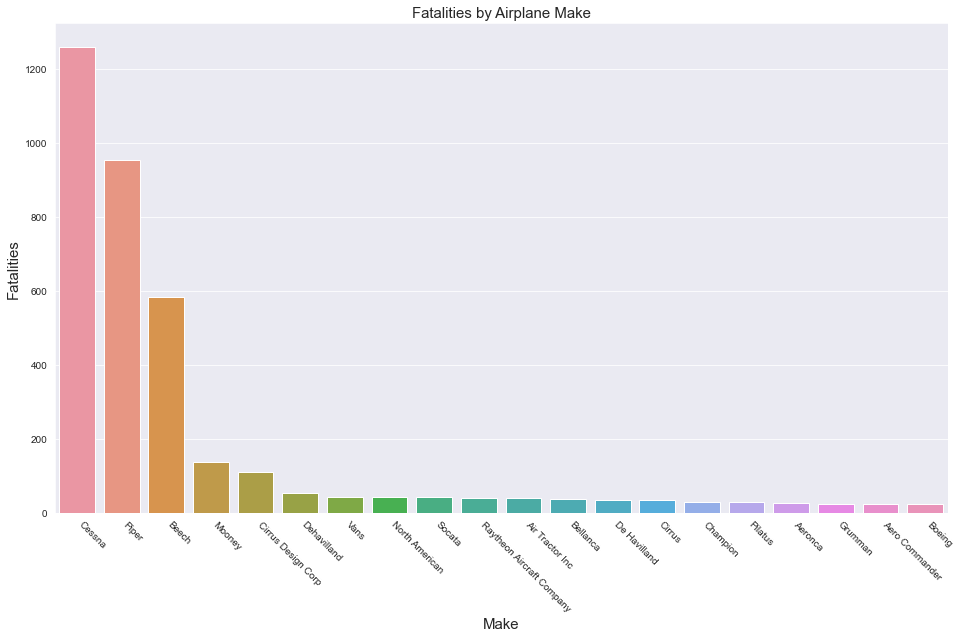

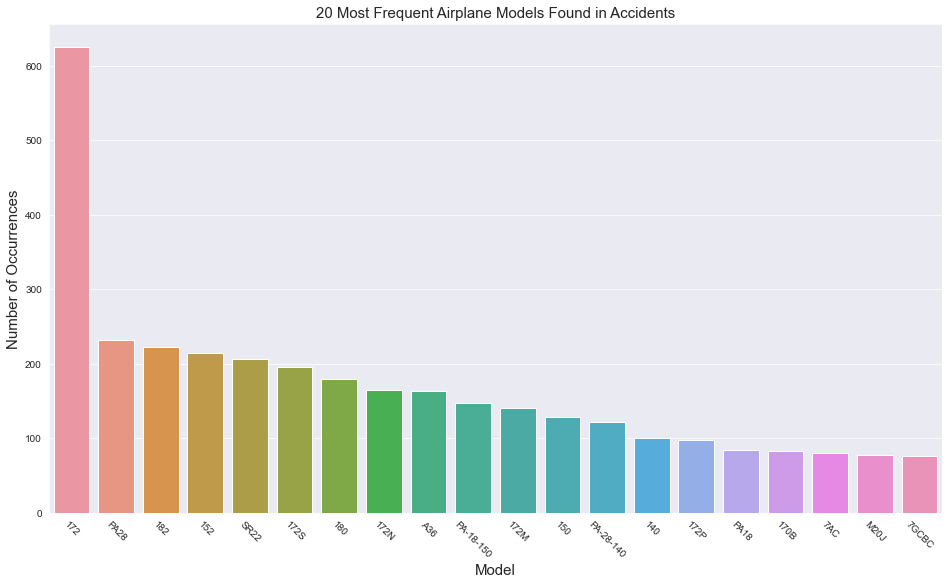

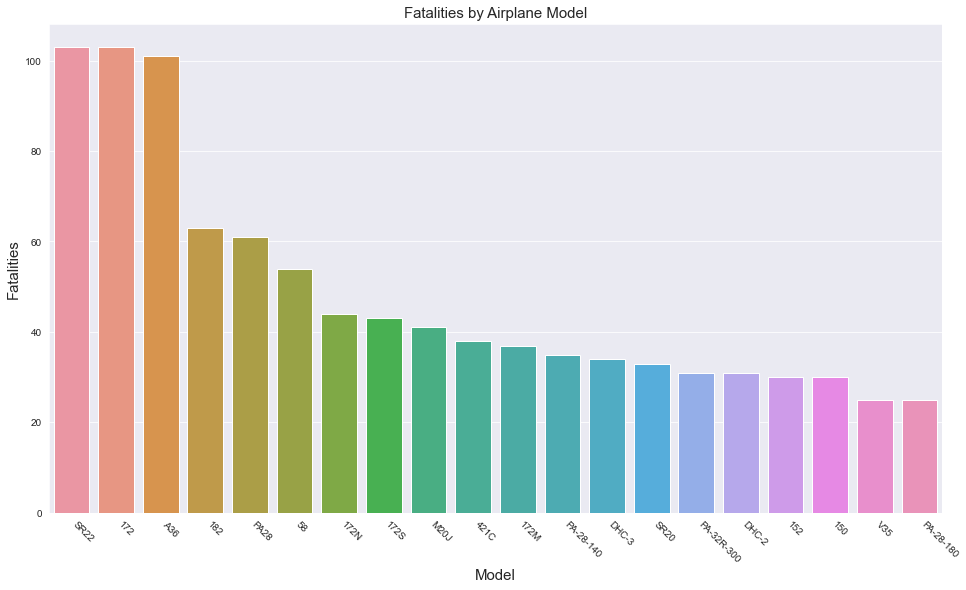

In [55]:
#Creating a figure showing investigation occurance by Airplane Make
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['make'].value_counts().index[:20], y=private_planes['make'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Makes Found in Investigations')
makes.set_xlabel('Make', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['make'].value_counts().index[:20], rotation=-45, ha='left');
plt.show()

#Showing fatalities by Airplane Make
fatalities=private_planes.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Make', fontsize=15)
f.set_xlabel('Make', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()


#Creating a figure showing investigation frequnecy by Airplane Model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['model'].value_counts().index[:20], y=private_planes['model'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Models Found in Accidents', fontsize=15)
makes.set_xlabel('Model', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['model'].value_counts().index[:20], rotation=-45, ha='center');
plt.show()

#Showing fatalities by Airplane Model
fatalities=private_planes.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Model', fontsize=15)
f.set_xlabel('Model', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()

We can see that although Cessna has nearly twice as many investigations as Piper, the difference in fatalities is less stark. As for models, the 172 was the most common model investigated but accounted for only the 3rd most deaths. The A36 model accounted for the most fatalities, despite being only the 9th most common model involved in investigations.

Ultimately a plane cannot be several types of makes and models -it can only be one. Therefore the next step in our analysis will be to combine make and model into one column, and use this column to make our final recommendations. Specifically, we will look to see which models have the highest percentage of deaths and injuries out of their total passengers, and which have the lowest.

**Commercial Plane Risk Assessment**

The second portin will asses what Commerical plane....

**Operation Location Risk Assessment**

Our third portion of the analysis will look into a operation location to make a recommendation on the top 1 or 2 regions to operate out of. We start by grouping the state with its corresponding region

In [56]:
#Creating a dictionary of state abbreviation and their corresponding region
state_region_dict = {'CT': 'North East', 'DE': 'North East', 'ME': 'North East', 'MD': 'North East', 'MA': 'North East', 'NH': 'North East',
                     'NJ': 'North East', 'NY': 'North East', 'PA': 'North East', 'RI': 'North East', 'VT': 'North East',
                     'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest',
                     'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',
                     'AL': 'South', 'AR': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South', 'MS': 'South',
                     'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
                     'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'}

# Add a new column 'region' to the dataframe and map the state to its corresponding region
usa_df['region'] = usa_df['state'].map(state_region_dict)

In [59]:
south_df = usa_df[usa_df['region'] == 'South']
midwest_df = usa_df[usa_df['region'] == 'Midwest']
northeast_df = usa_df[usa_df['region'] == 'North East']
west_df = usa_df[usa_df['region'] == 'West']

# Filter the dataframe to only include private planes
private_planes_df = usa_df.loc[usa_df['passengers'] < 20]

# Group the data by state and sum the total injuries for private planes
injuries_by_state_south = private_planes_df[private_planes_df['region'] == 'South'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_west = private_planes_df[private_planes_df['region'] == 'West'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_northeast = private_planes_df[private_planes_df['region'] == 'North East'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_midwest =  private_planes_df[private_planes_df['region'] == 'Midwest'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()

**Visualizations**

We start with looking at the accident data by states in each region for Private Aircraft

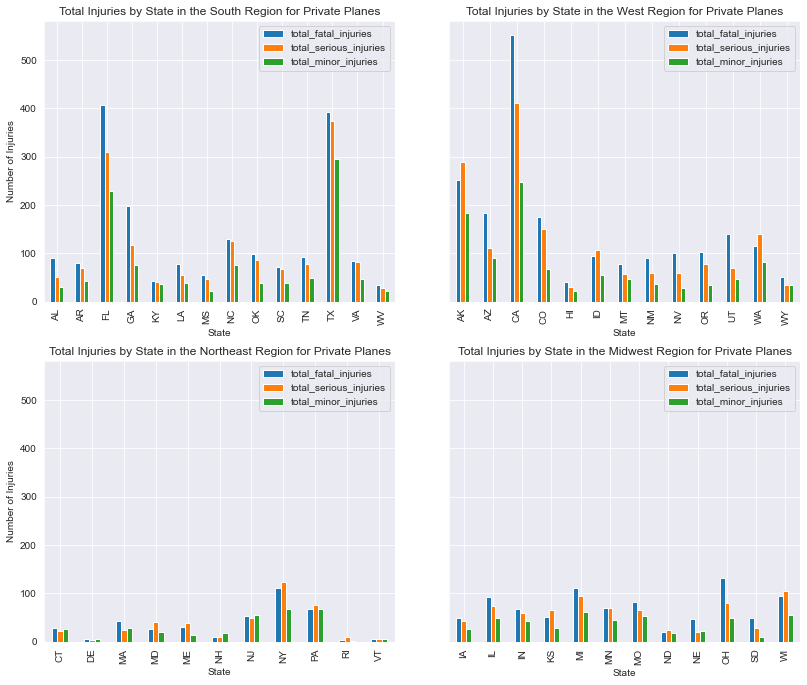

In [60]:
# Set the figure size and layout
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.tight_layout(pad=4.0)

# Create a bar chart of the total injuries by state for private planes
injuries_by_state_south.plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Total Injuries by State in the South Region for Private Planes')
ax[0,0].set_xlabel('State')
ax[0,0].set_ylabel('Number of Injuries')

injuries_by_state_west.plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('Total Injuries by State in the West Region for Private Planes')
ax[0,1].set_xlabel('State')
ax[0,1].set_ylabel('Number of Injuries')

injuries_by_state_northeast.plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('Total Injuries by State in the Northeast Region for Private Planes')
ax[1,0].set_xlabel('State')
ax[1,0].set_ylabel('Number of Injuries')

injuries_by_state_midwest.plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Total Injuries by State in the Midwest Region for Private Planes')
ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Number of Injuries')

plt.show()

Based off the accident data I would recommend North East as the best